# The Spark Foundation - Data Science & Business Analytics Internship
## TASK-4: 'Exploratory Data Analysis' on dataset ‘Global Terrorism’
### Author- Vaishnavi Sakhare
### Batch- June 2023
#### Dataset: https://drive.google.com/file/d/1luTU7xBvI7QAGPbQMxEHcgKUi9d6UeP_/view

## Importing Libraries & loading datasets 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\Users\Vaishnavi\Desktop\globalterrorismdb_0718dist.csv" ,encoding='ISO-8859-1',low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.shape

(181691, 135)

In [4]:
df.columns 

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
#Number of missing values in the dataframe grouped by column names
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [6]:
#total number of missing values or cells with missing values in the entire dataframe
missing_values = (df.isnull().sum()).sum()
missing_values

13853997

In [7]:
#total cells in the dataframe
total_cells = df.size
total_cells

24528285

In [8]:
#%of missing values in our dataframe 'df'
(missing_values/total_cells)*100

56.481718962414206

##### We can see more than half the values in the dataframe are missing!

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [10]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing 

In [11]:
# There are a total of 135 columns. So, We need to extract the important one 
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [12]:
df.dropna(axis=1,how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [13]:
df.shape

(181691, 135)

In [14]:
df = df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','success',
          'attacktype1_txt','targtype1_txt','target1','nkill','nwound','summary','gname','weaptype1_txt','motive']] 

In [15]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State',
                   'city':'City','success':'Success','region_txt':'Region','attacktype1_txt':'Attacktype',
                   'target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                   'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [16]:
df.head()


,Year,Month,Day,Country,Region,State,City,Success,Attacktype,Target_type,Target,Killed,Wounded,Summary,Group,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,1,Assassination,Private Citizens & Property,Julio Guzman,1.0,0.0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0.0,0.0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,Employee,1.0,0.0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,NaN,NaN,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,NaN,NaN,NaN,Unknown,Incendiary,NaN


In [17]:
df.describe()

,Year,Month,Day,Success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.403272,3.167668
std,13.259430,3.388303,8.814045,0.313391,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000


### Identifying the Missing Values 

In [18]:
# identifying null values in dataset
df.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
State             421
City              434
Success             0
Attacktype          0
Target_type         0
Target            636
Killed          10313
Wounded         16311
Summary         66129
Group               0
Weapon_type         0
Motive         131130
dtype: int64

In [19]:
df['State'] = df['State'].fillna('Unknown')
df['City'] = df['City'].fillna('Unknown')

In [20]:
df['Wounded'] = df['Wounded'].fillna(0).astype(int)
df['Killed'] = df['Killed'].fillna(0).astype(int)
df.describe()

,Year,Month,Day,Success,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,2.266860,2.883291
std,13.259430,3.388303,8.814045,0.313391,11.227057,34.309746
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,1.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Year         181691 non-null  int64 
 1   Month        181691 non-null  int64 
 2   Day          181691 non-null  int64 
 3   Country      181691 non-null  object
 4   Region       181691 non-null  object
 5   State        181691 non-null  object
 6   City         181691 non-null  object
 7   Success      181691 non-null  int64 
 8   Attacktype   181691 non-null  object
 9   Target_type  181691 non-null  object
 10  Target       181055 non-null  object
 11  Killed       181691 non-null  int64 
 12  Wounded      181691 non-null  int64 
 13  Summary      115562 non-null  object
 14  Group        181691 non-null  object
 15  Weapon_type  181691 non-null  object
 16  Motive       50561 non-null   object
dtypes: int64(6), object(11)
memory usage: 23.6+ MB


In [22]:
#Cleaned Data
df.head()

,Year,Month,Day,Country,Region,State,City,Success,Attacktype,Target_type,Target,Killed,Wounded,Summary,Group,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,1,Assassination,Private Citizens & Property,Julio Guzman,1,0,NaN,MANO-D,Unknown,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,1,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",0,0,NaN,23rd of September Communist League,Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,1,Assassination,Journalists & Media,Employee,1,0,NaN,Unknown,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,1,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,0,0,NaN,Unknown,Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,1,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,0,0,NaN,Unknown,Incendiary,NaN


### Getting Insights from data 

Number of unique values/observations in each column/attribute.

In [23]:
df.nunique()

Year               47
Month              13
Day                32
Country           205
Region             12
State            2855
City            36674
Success             2
Attacktype          9
Target_type        22
Target          86006
Killed            205
Wounded           237
Summary        112492
Group            3537
Weapon_type        12
Motive          14490
dtype: int64

In [24]:
df['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

In [25]:
df['Attacktype'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [26]:
df['Target'].unique()

array(['Julio Guzman', 'Nadine Chaval, daughter', 'Employee', ...,
       'Personal Security Officer of Council Member Ihuing Pame: Prafulla Phukan',
       'Jewelry Shop', 'Hmeymim Air Base'], dtype=object)

In [27]:
df['Group'].nunique()

3537

In [28]:
df['Weapon_type'].unique()

array(['Unknown', 'Explosives', 'Incendiary', 'Firearms', 'Chemical',
       'Melee', 'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [29]:
df['Country'].value_counts().head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

In [30]:
df['Region'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

In [31]:
df['State'].value_counts().head(20)

Baghdad                                7645
Unknown                                4711
Northern Ireland                       4498
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Punjab                                 1778
Kirkuk                                 1669
Santiago Metropolitan                  1639
Banaadir                               1613
West Bank                              1584
Name: State, dtype: int64

In [32]:
df['Target'].value_counts().head(20)

Civilians         6461
Unknown           5918
Soldiers          3157
Patrol            2942
Checkpoint        2905
Vehicle           2785
Officers          1787
Village           1679
Military Unit     1533
Bus               1335
Convoy            1262
Unit              1195
Market            1194
Police Station    1190
Base               885
Office             875
House              824
Checkpost          788
Post               739
Mosque             694
Name: Target, dtype: int64

In [33]:
df['City'].value_counts().head(20)

Unknown           10209
Baghdad            7589
Karachi            2652
Lima               2359
Mosul              2265
Belfast            2171
Santiago           1621
Mogadishu          1581
San Salvador       1558
Istanbul           1048
Athens             1019
Bogota              984
Kirkuk              925
Beirut              918
Medellin            848
Benghazi            840
Peshawar            819
Quetta              803
Guatemala City      755
Baqubah             745
Name: City, dtype: int64

In [34]:
df['Attacktype'].value_counts().head(10)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: Attacktype, dtype: int64

In [35]:
df['Group'].value_counts().head(20)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

In [36]:
df['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

## Data Visualisation

### Terrorist activities in each year

<function matplotlib.pyplot.show(close=None, block=None)>

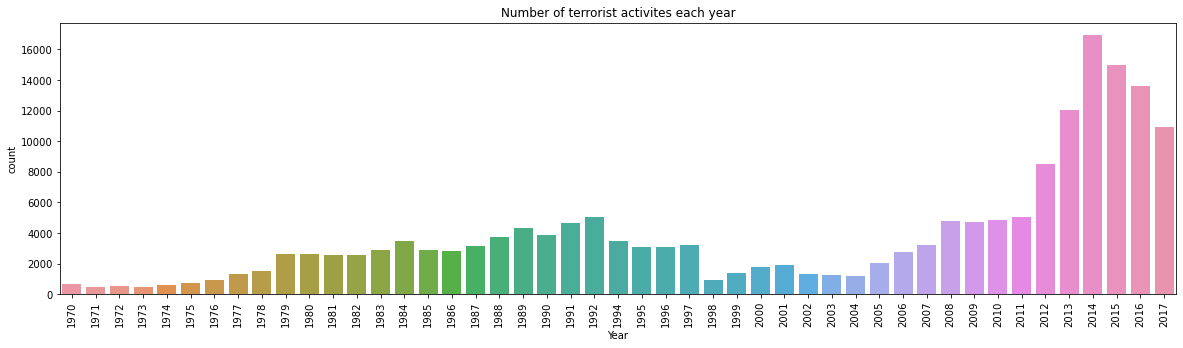

In [37]:
plt.figure(figsize = (20,5))
sns.countplot(x='Year',data=df)
plt.xticks(rotation=90)
plt.title('Number of terrorist activites each year')
plt.show

### Affected countries due to terrorist attacks

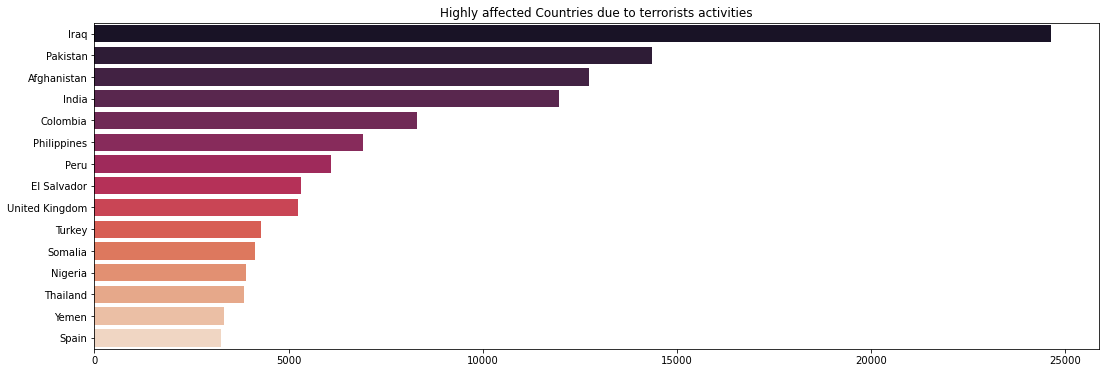

In [38]:
plt.figure(figsize=(18,6))
sns.barplot(y=df['Country'].value_counts()[:15].index,x=df['Country'].value_counts()[:15].values,palette='rocket')
plt.title('Highly affected Countries due to terrorists activities')
plt.show()   

### Affected regions due to terrorist attacks

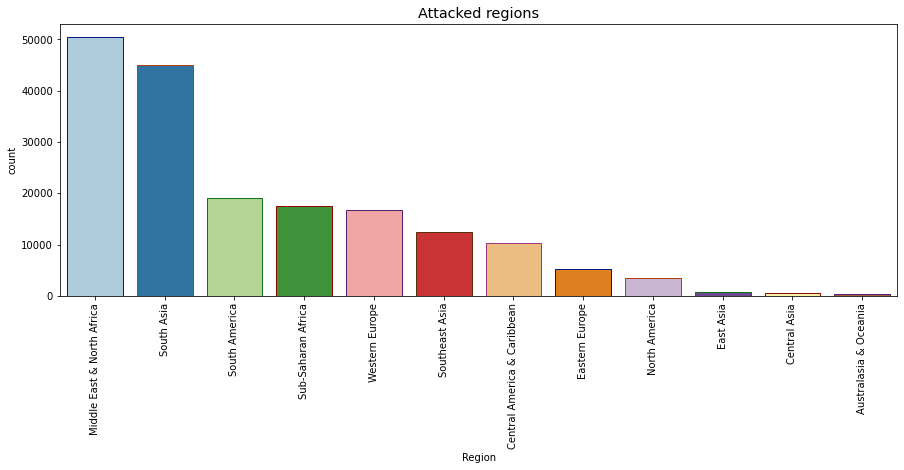

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(x='Region',data=df,palette='Paired',edgecolor=sns.color_palette('dark',7),
              order=df['Region'].value_counts().index)
plt.rcParams.update({'font.size':12});
plt.xticks(rotation=90)
plt.title('Attacked regions')
plt.show()

### Affected cities due to terrorist attacks

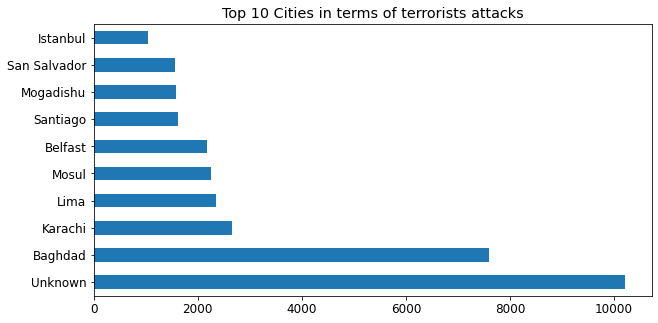

In [40]:
df['City'].value_counts().head(10).plot(kind='barh',figsize=[10,5])
plt.title('Top 10 Cities in terms of terrorists attacks')
plt.show() 

### Most affected states

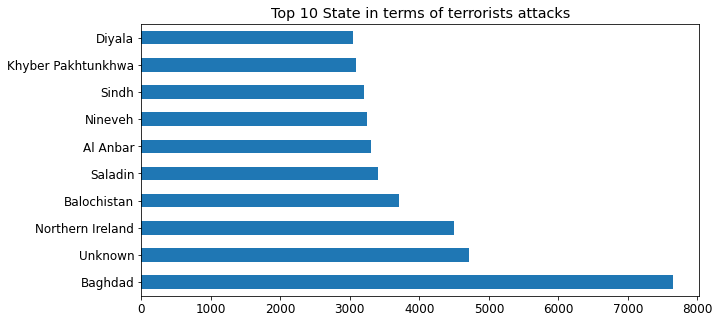

In [41]:
df['State'].value_counts().head(10).plot(kind='barh',figsize=[10,5])
plt.title('Top 10 State in terms of terrorists attacks')
plt.show() 

### Attacking Methods used by the terrorists

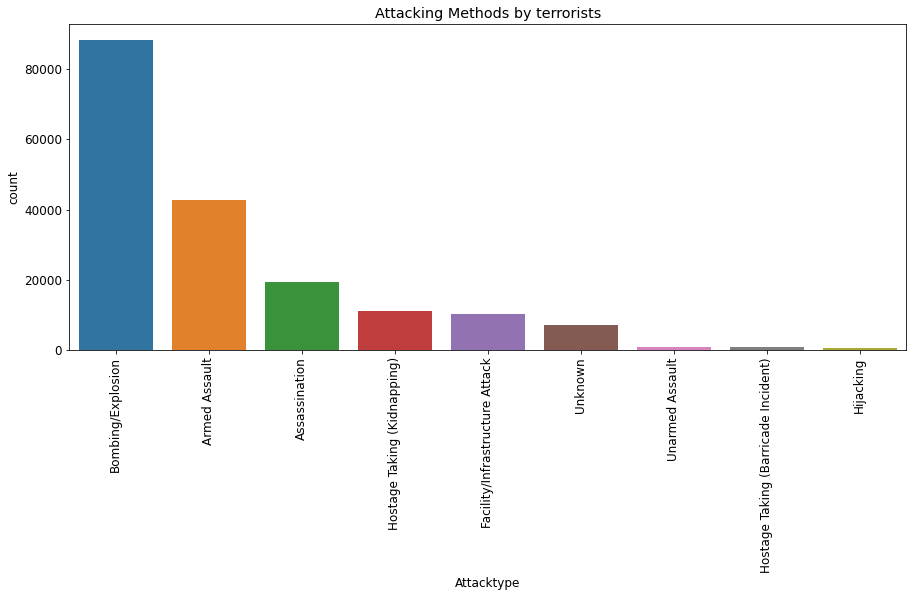

In [42]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Attacktype',data=df,order=df['Attacktype'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by terrorists')
plt.show()

### Most used Weapons

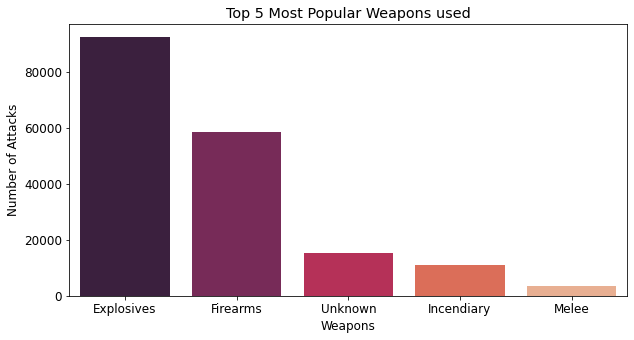

In [43]:
plt.figure(figsize = (10,5))
sns.barplot(x=df.Weapon_type.value_counts().head(5).index,y=df.Weapon_type.value_counts().head(5).values,
            palette='rocket')
plt.title('Top 5 Most Popular Weapons used')
plt.xlabel('Weapons')
plt.ylabel('Number of Attacks')
plt.show()

### Favourite Targets

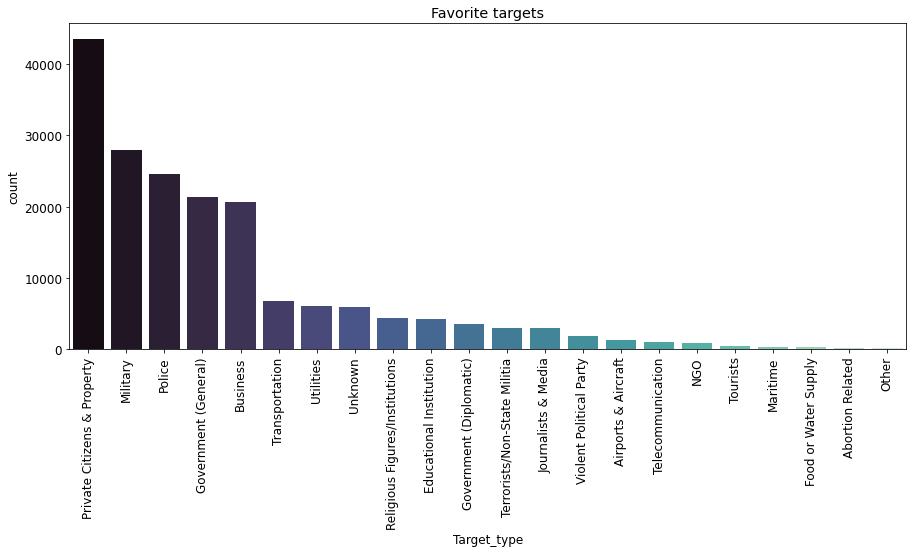

In [44]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Target_type',data=df,palette='mako',order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Favorite targets")
plt.show()

### Most Active Terrorist Groups

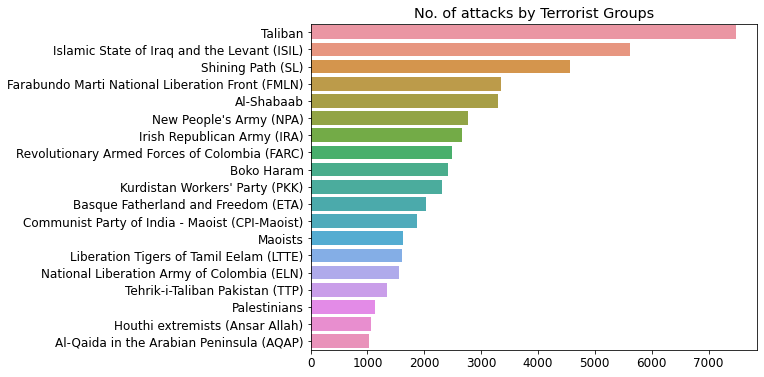

In [45]:
sns.barplot(x=df['Group'].value_counts()[1:20].values,y=df['Group'].value_counts()[1:20].index)
fig=plt.gcf()
plt.title('No. of attacks by Terrorist Groups')
fig.set_size_inches(8,6)
plt.show()

Text(0.5, 1.0, 'Successfull terrorist operations')

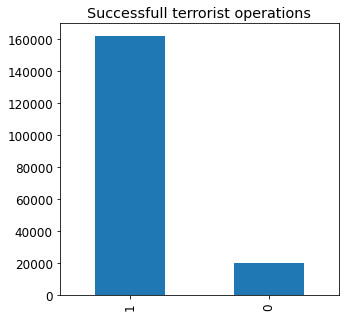

In [46]:
df['Success'].value_counts().plot(kind='bar',figsize=[5,5])
plt.title("Successfull terrorist operations")

### Number of people killed over years and which weapon is used

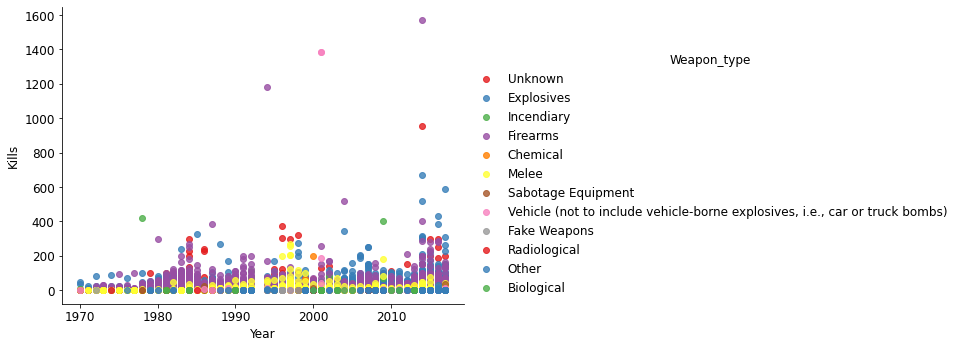

In [47]:
sns.lmplot(x='Year',y='Killed',data=df,fit_reg=False,hue='Weapon_type',legend=True, palette='Set1',aspect=15/10)
plt.xlabel('Year')
plt.ylabel('Kills')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

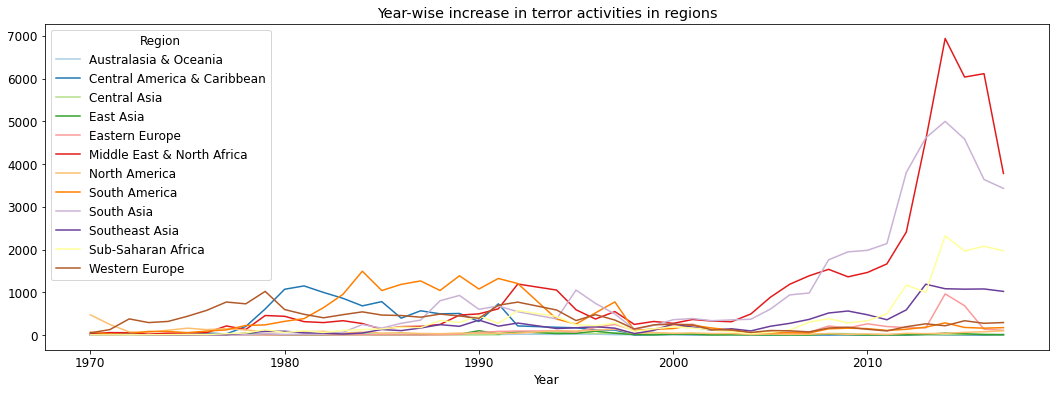

In [48]:
terror_region=pd.crosstab(df.Year,df.Region)
terror_region.plot(color=sns.color_palette('Paired',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title("Year-wise increase in terror activities in regions")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

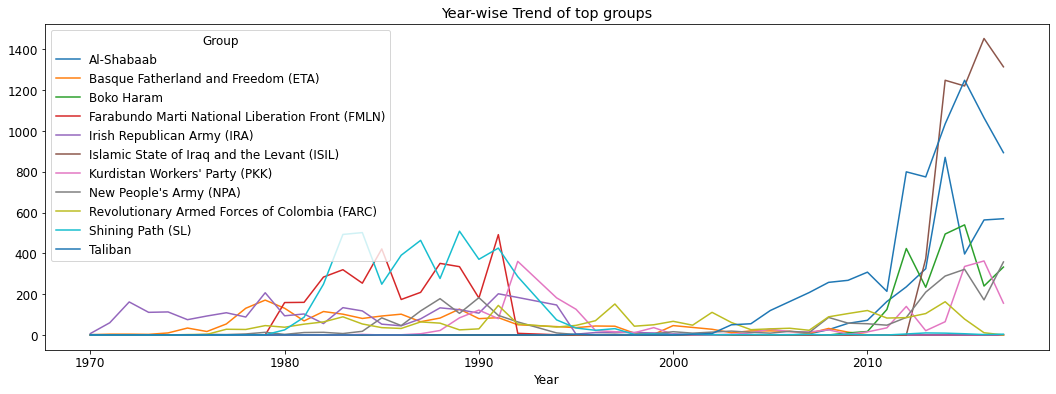

In [49]:
top_groups = df[df['Group'].isin(df['Group'].value_counts()[1:12].index)]
pd.crosstab(top_groups.Year, top_groups.Group).plot(color=sns.color_palette())
plt.gcf().set_size_inches(18,6)
plt.title("Year-wise Trend of top groups")
plt.show

## Conclusions 
    1. Private Citizens and Property are the most attacked targets, followed by the Military, Police, Government, Transportation etc.
    2. Middle East & North Africa were the top affected region. Most number of people are wounded and/or killed here.
    3. The country that was most affected by terror attacks was Iraq. Iraq had the most number of people wounded and/or killed.
    4. The State & the City that was most affected by terror attacks was Baghdad.
    5. Year 2014 had the most number of terror attacks in the last decade! Approximately 17000 attacks in one year. This means that around 47 attacks were happening every single day during that year in multiple locations around the world!
    6. Bombing/Explosion has been consistently the most popular method of attack over the course of the last 5 decades
    7. Explosives have been consistently the most popular weapon of choice for terrorists.
    8. Taliban has gained much prominence since 2012 and is now responsible for most number of terror attacks.
    9. Hot zone of terrorist according to State - Northern ireland, Country - Iraq, Region - Middle east and North Africa, City - Baghdad

## Recommendation
    1. Since Private Citizens and Property are being targeted consistently and explosives are most favoured weapon type of terror groups, tighter security and surveillance should be provided, especially in densely populated regions
    2. More surveillance is required especially in the Middle East & North African Regions.
    3. Stricter rules to prevent the movement of explosives into and from countries.